## Import Necessary Libraries

In [2]:
import pandas as pd
import mysql.connector as mysql
import re
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Connecting to Database - used_car

In [3]:
conn = mysql.connect(host='localhost', database='used_car', user='root', password='root')

## From Database data table bring values to DataFrame

In [4]:
df = pd.read_sql("SELECT * FROM used_car.data",conn)
df.head(2)

C:\Users\divesh\AppData\Local\Temp\ipykernel_2192\2983631028.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM used_car.X_val",conn)


Year  Kilometers_Driven  Seats  Mileage_car  Engine_CC  Power_bhp Location  \
0  2014              40929      4        32.26        998       58.2      4.0   
1  2013              54493      5        24.70        796       47.3      3.0   

   Fuel_Type  Transmission  Owner_Type  Manufacture  Model  Mileage_Units  
0          0             1           0           19    157              1  
1          4             1           2           19    147              2

## Type of Dataset

In [5]:
type(df)

pandas.core.frame.DataFrame

## Shape of the Dataset

In [6]:
print("Number of Dimensions: ",df.ndim)
shape = df.shape
print("\nTotal Number of Rows: ",shape[0])
print("Total Number of Columns: ",shape[1])

Number of Dimensions:  2

Total Number of Rows:  1234
Total Number of Columns:  13


## Displaying Column Names

In [7]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Seats', 'Mileage_car', 'Engine_CC',
       'Power_bhp', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Manufacture', 'Model', 'Mileage_Units'],
      dtype='object')

## Displaying DataType of each Column

In [8]:
df.dtypes

Year                   int64
Kilometers_Driven      int64
Seats                  int64
Mileage_car          float64
Engine_CC              int64
Power_bhp            float64
Location              object
Fuel_Type              int64
Transmission           int64
Owner_Type             int64
Manufacture            int64
Model                  int64
Mileage_Units          int64
dtype: object

## Null Values Finding

In [9]:
print("Is there any Null Values in the Data: ", df.isnull().sum().any())

Is there any Null Values in the Data:  False


In [10]:
print("Total Number of Null Values in the Data: ",df.isnull().sum().sum())

Total Number of Null Values in the Data:  0


In [11]:
print("Each Feature Null Value count: \n\n",df.isnull().sum())

Each Feature Null Value count: 

 Year                 0
Kilometers_Driven    0
Seats                0
Mileage_car          0
Engine_CC            0
Power_bhp            0
Location             0
Fuel_Type            0
Transmission         0
Owner_Type           0
Manufacture          0
Model                0
Mileage_Units        0
dtype: int64


## Dataset Basic Information

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               1234 non-null   int64  
 1   Kilometers_Driven  1234 non-null   int64  
 2   Seats              1234 non-null   int64  
 3   Mileage_car        1234 non-null   float64
 4   Engine_CC          1234 non-null   int64  
 5   Power_bhp          1234 non-null   float64
 6   Location           1234 non-null   object 
 7   Fuel_Type          1234 non-null   int64  
 8   Transmission       1234 non-null   int64  
 9   Owner_Type         1234 non-null   int64  
 10  Manufacture        1234 non-null   int64  
 11  Model              1234 non-null   int64  
 12  Mileage_Units      1234 non-null   int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 125.5+ KB


# Data Cleaning

## Dropping S_No Column

In [12]:
df.drop(['S_No'], inplace=True, axis=1)

In [13]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

## Split the Name column and converting into Manufacture and Model columns

In [14]:
df[['Manufacture', 'Model']] = df['Name'].str.split(' ', 1, expand=True)

C:\Users\divesh\AppData\Local\Temp\ipykernel_25992\3620296706.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Manufacture', 'Model']] = df['Name'].str.split(' ', 1, expand=True)


In [15]:
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   New_Price  Price Manufacture                       Model  
0       None   1.75      Maruti             Wagon R LXI CNG  
1       None  12.50     Hyundai    Creta 1.6 CRDi SX Option  
2  8.61 Lakh   4.50       Honda                      Jazz V  
3       None   6.00      Maruti                  Ertiga VDI  
4       None  17.74        Audi  A4 New 2.0 TDI Multitronic

## Dropping Name Column

In [16]:
df.drop(['Name'], inplace=True, axis=1)

In [17]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price',
       'Price', 'Manufacture', 'Model'],
      dtype='object')

## Split the Mileage column and convert into Mileage car and mileage units columns

In [18]:
df[['Mileage_car', 'Mileage_Units']] = df['Mileage'].str.split(' ', 1, expand=True)

C:\Users\divesh\AppData\Local\Temp\ipykernel_25992\1806788189.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Mileage_car', 'Mileage_Units']] = df['Mileage'].str.split(' ', 1, expand=True)


In [19]:
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

      Mileage   Engine      Power  Seats  New_Price  Price Manufacture  \
0  26.6 km/kg   998 CC  58.16 bhp    5.0       None   1.75      Maruti   
1  19.67 kmpl  1582 CC  126.2 bhp    5.0       None  12.50     Hyundai   
2   18.2 kmpl  1199 CC   88.7 bhp    5.0  8.61 Lakh   4.50       Honda   
3  20.77 kmpl  1248 CC  88.76 bhp    7.0       None   6.00      Maruti   
4   15.2 kmpl  1968 CC  140.8 bhp    5.0       None  17.74        Audi   

                        Model Mileage_car Mileage_Units  
0             Wagon R LXI CNG        26.6         km/kg  
1    Creta 1.6 CRDi SX Option       19.67          kmpl  
2                      Jazz V        18.2          kmpl  
3                  Ertiga VDI       20.77          kmpl  
4  A4 New 2.0 TDI Multitronic        15.2          kmpl

In [20]:
df.drop(['Mileage'], inplace=True, axis=1)

In [21]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Engine', 'Power', 'Seats', 'New_Price', 'Price',
       'Manufacture', 'Model', 'Mileage_car', 'Mileage_Units'],
      dtype='object')

## Engine column value conists of number with units. All values are having Same Units That's why we are going to rename the column name and removing units

In [22]:
df[['Engine_CC', 'Engine_Units']] = df['Engine'].str.split(' ', 1, expand=True)

C:\Users\divesh\AppData\Local\Temp\ipykernel_25992\19102501.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Engine_CC', 'Engine_Units']] = df['Engine'].str.split(' ', 1, expand=True)


In [23]:
df.drop(['Engine'], inplace=True, axis=1)
df.drop(['Engine_Units'], inplace=True, axis=1)

In [24]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Power', 'Seats', 'New_Price', 'Price', 'Manufacture',
       'Model', 'Mileage_car', 'Mileage_Units', 'Engine_CC'],
      dtype='object')

In [25]:
df.head(2)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0   Mumbai  2010              72000       CNG       Manual      First   
1     Pune  2015              41000    Diesel       Manual      First   

       Power  Seats New_Price  Price Manufacture                     Model  \
0  58.16 bhp    5.0      None   1.75      Maruti           Wagon R LXI CNG   
1  126.2 bhp    5.0      None  12.50     Hyundai  Creta 1.6 CRDi SX Option   

  Mileage_car Mileage_Units Engine_CC  
0        26.6         km/kg       998  
1       19.67          kmpl      1582

## Power column value conists of number with units. All values are having Same Units That's why we are going to rename the column name and removing units

In [26]:
df[['Power_bhp', 'Power_Units']] = df['Power'].str.split(' ', 1, expand=True)

C:\Users\divesh\AppData\Local\Temp\ipykernel_25992\585262255.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Power_bhp', 'Power_Units']] = df['Power'].str.split(' ', 1, expand=True)


In [27]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Power', 'Seats', 'New_Price', 'Price', 'Manufacture',
       'Model', 'Mileage_car', 'Mileage_Units', 'Engine_CC', 'Power_bhp',
       'Power_Units'],
      dtype='object')

In [28]:
df.drop(['Power'], inplace=True, axis=1)
df.drop(['Power_Units'], inplace=True, axis=1)

In [29]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'New_Price', 'Price', 'Manufacture', 'Model',
       'Mileage_car', 'Mileage_Units', 'Engine_CC', 'Power_bhp'],
      dtype='object')

In [30]:
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats  New_Price  Price Manufacture                       Model  \
0    5.0       None   1.75      Maruti             Wagon R LXI CNG   
1    5.0       None  12.50     Hyundai    Creta 1.6 CRDi SX Option   
2    5.0  8.61 Lakh   4.50       Honda                      Jazz V   
3    7.0       None   6.00      Maruti                  Ertiga VDI   
4    5.0       None  17.74        Audi  A4 New 2.0 TDI Multitronic   

  Mileage_car Mileage_Units Engine_CC Power_bhp  
0        26.6         km/kg       998     58.16  
1       19.67          kmpl      1582     126.2  
2        18.2          kmpl      1199      88.7  
3       20.77          kmpl      1248     88.76  
4        15.2          kmpl      1968     140.8

## New_Price Column having morethan 50% null values. Dropping New_Price Column

In [31]:
df.drop(['New_Price'], inplace=True, axis=1)

## Finding Null Values

In [32]:
df.isnull().sum().sum()

1383

## Replace nan with None

In [33]:
df = df.replace({np.nan: None})

## Finding column datatypes and column names

In [34]:
df.dtypes

Location             object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Seats                object
Price                object
Manufacture          object
Model                object
Mileage_car          object
Mileage_Units        object
Engine_CC            object
Power_bhp            object
dtype: object

## Changing the Datatypes of Seats and Price

In [35]:
df['Seats'] = df['Seats'].astype(float)
df['Price'] = df['Price'].astype(float)

## Working on Seats Column

In [36]:
df['Seats'].value_counts()

5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64

In [37]:
df[df['Seats']==0.0]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
3999  Hyderabad  2012             125000    Petrol    Automatic      First   

      Seats  Price Manufacture                         Model Mileage_car  \
3999    0.0   18.0        Audi  A4 3.2 FSI Tiptronic Quattro        10.5   

     Mileage_Units Engine_CC Power_bhp  
3999          kmpl      3197      null

#### Note*: Audi A4 having 5.0 seats so, we are placing 0.0 with 5.0

In [38]:
df['Seats'] = df['Seats'].replace({0.0: 5.0})

In [39]:
df['Seats'].value_counts()

5.0     6048
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64

### Handling Null values in Seats Column

In [40]:
df[df['Seats'].isnull()]

Location  Year  Kilometers_Driven Fuel_Type Transmission  \
194    Ahmedabad  2007              60006    Petrol       Manual   
208      Kolkata  2010              42001    Petrol       Manual   
229    Bangalore  2015              70436    Diesel       Manual   
733      Chennai  2006              97800    Petrol       Manual   
749       Mumbai  2008              55001    Diesel    Automatic   
1294       Delhi  2009              55005    Petrol       Manual   
1327   Hyderabad  2015              50295    Petrol       Manual   
1385        Pune  2004             115000    Petrol       Manual   
1460  Coimbatore  2008              69078    Petrol       Manual   
1917      Jaipur  2005              88000    Petrol       Manual   
2074        Pune  2011              24255    Petrol       Manual   
2096  Coimbatore  2004              52146    Petrol       Manual   
2264        Pune  2012              24500    Petrol       Manual   
2325        Pune  2015              67000    Petrol       Manual   
2335      Mumbai  2007              55000    Petrol       Manual   
2369     Chennai  2008              56000    Petrol       Manual   
2530       Kochi  2014              64158    Diesel    Automatic   
2542   Bangalore  2011              65000    Petrol       Manual   
2623        Pune  2012              95000    Diesel    Automatic   
2668     Kolkata  2014              32986    Petrol       Manual   
2737      Jaipur  2001             200000    Petrol       Manual   
2780        Pune  2009             100000    Petrol       Manual   
2842   Bangalore  2012              43000    Petrol       Manual   
3272      Mumbai  2008              81000    Diesel    Automatic   
3404      Jaipur  2006             125000    Petrol       Manual   
3520       Delhi  2012              90000    Diesel    Automatic   
3522       Kochi  2012              66400    Petrol       Manual   
3800      Mumbai  2012             129000    Diesel    Automatic   
3810     Kolkata  2013              27000    Petrol    Automatic   
3882     Kolkata  2010              40000    Petrol       Manual   
4011        Pune  2011              45271    Diesel       Manual   
4152      Mumbai  2003              75000    Diesel    Automatic   
4229   Bangalore  2005              79000    Petrol       Manual   
4577       Delhi  2012              72000    Diesel    Automatic   
4604        Pune  2011              98000    Petrol       Manual   
4697       Kochi  2017              17941    Petrol       Manual   
4712        Pune  2003              80000    Petrol       Manual   
4952     Kolkata  2010              47000    Petrol       Manual   
5015       Delhi  2006              63000    Petrol       Manual   
5185       Delhi  2012              52000    Petrol       Manual   
5270   Bangalore  2002              53000    Petrol       Manual   
5893     Chennai  2008              51000    Petrol       Manual   
6042   Bangalore  2009              72000    Petrol       Manual   
6541   Bangalore  2012              56600    Diesel       Manual   
6544   Bangalore  2012              58000    Petrol    Automatic   
6633     Kolkata  2016              27000    Diesel       Manual   
6643   Bangalore  2009             150000    Diesel    Automatic   
6651     Kolkata  2015              36009    Petrol       Manual   
6677      Jaipur  2010              65000    Petrol       Manual   
6685        Pune  2010             115000    Petrol       Manual   
6880     Chennai  2009              95000    Diesel    Automatic   
6902       Kochi  2012              59311    Petrol       Manual   
6957       Kochi  2019              11574    Petrol       Manual   

          Owner_Type  Seats  Price Manufacture  \
194            First    NaN   2.95       Honda   
208            First    NaN   2.11      Maruti   
229            First    NaN   3.60        Ford   
733            Third    NaN   1.75      Maruti   
749           Second    NaN  26.50        Land   
1294           First    NaN   3.20 

#### Note*: By observing all values Land Rover and Ford Endeavour both are having 7.0 seats remaining all having 5.0

In [41]:
df.loc[(df['Manufacture'] == 'Land') & (df['Seats'].isnull()), 'Seats'] = 7.0
df.loc[(df['Manufacture'] == 'Ford') & (df['Seats'].isnull()), 'Seats'] = 7.0
df['Seats'] = df['Seats'].fillna(5.0)

In [42]:
df['Seats'].isnull().sum()

0

### Handling Data Types of Seats Column

In [43]:
df['Seats'] = df['Seats'].astype(int)

In [44]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                  int32
Price                float64
Manufacture           object
Model                 object
Mileage_car           object
Mileage_Units         object
Engine_CC             object
Power_bhp             object
dtype: object

## Working on Mileage_car and Milleage_Units

### Handling Null Values

In [45]:
df[df['Mileage_car'].isnull()]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
4446  Chennai  2016              50000  Electric    Automatic      First   
4904   Mumbai  2011              44000  Electric    Automatic      First   

      Seats  Price Manufacture               Model Mileage_car Mileage_Units  \
4446      5  13.00    Mahindra         E Verito D4        None          None   
4904      5  12.75      Toyota  Prius 2009-2016 Z4        None          None   

     Engine_CC Power_bhp  
4446        72        41  
4904      1798        73

In [46]:
df.loc[(df['Manufacture'] == 'Mahindra') & (df['Mileage_car'].isnull()), 'Mileage_car'] = 110
df.loc[(df['Manufacture'] == 'Mahindra') & (df['Mileage_Units'].isnull()), 'Mileage_Units'] = 'Km/Chrg'

df.loc[(df['Manufacture'] == 'Toyota') & (df['Mileage_car'].isnull()), 'Mileage_car'] = 400
df.loc[(df['Manufacture'] == 'Toyota') & (df['Mileage_Units'].isnull()), 'Mileage_Units'] = 'Km/Chrg'

In [47]:
df['Mileage_car'].isnull().sum()

0

In [48]:
df['Mileage_Units'].isnull().sum()

0

### Handling Data Types of Mileage_car Column

In [49]:
df['Mileage_car'] = df['Mileage_car'].astype(float)

In [50]:
df['Mileage_car'].dtype

dtype('float64')

In [51]:
df[df['Mileage_car']==0.0]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
14          Pune  2012              85000    Diesel    Automatic     Second   
67    Coimbatore  2019              15369    Diesel    Automatic      First   
79     Hyderabad  2005              87591    Petrol       Manual      First   
194    Ahmedabad  2007              60006    Petrol       Manual      First   
229    Bangalore  2015              70436    Diesel       Manual      First   
...          ...   ...                ...       ...          ...        ...   
6633     Kolkata  2016              27000    Diesel       Manual      First   
6697      Jaipur  2007              85000    Petrol       Manual     Second   
6857      Mumbai  2011              87000    Diesel    Automatic      First   
6957       Kochi  2019              11574    Petrol       Manual      First   
7226   Ahmedabad  2014              41000    Petrol       Manual      First   

      Seats  Price    Manufacture                       Model  Mileage_car  \
14        5  17.50           Land   Rover Freelander 2 TD4 SE          0.0   
67        5  35.67  Mercedes-Benz  C-Class Progressive C 220d          0.0   
79        5   1.30        Hyundai              Santro Xing XL          0.0   
194       5   2.95          Honda                City 1.5 GXI          0.0   
229       7   3.60           Ford                 Figo Diesel          0.0   
...     ...    ...            ...                         ...          ...   
6633      5    NaN       Mahindra                  TUV 300 P4          0.0   
6697      5    NaN        Hyundai              Santro Xing XL          0.0   
6857      5    NaN           Land   Rover Freelander 2 TD4 SE          0.0   
6957      5    NaN          Honda            Jazz 2020 Petrol          0.0   
7226      5    NaN        Hyundai              Santro Xing GL          0.0   

     Mileage_Units Engine_CC Power_bhp  
14            kmpl      2179       115  
67            kmpl      1950       194  
79            kmpl      1086      null  
194           kmpl      None      None  
229           kmpl      1498        99  
...            ...       ...       ...  
6633          kmpl      None      None  
6697          kmpl      1086      null  
6857          kmpl      2179       115  
6957          kmpl      1199      88.7  
7226          kmpl      1086        62  

[81 rows x 14 columns]

In [52]:
df['Model'][df['Mileage_car']==0.0].value_counts()

Santro Xing GL                             10
M-Class ML 350 4Matic                      10
Santro Xing XL                              7
Rover Freelander 2 TD4 SE                   5
Santro Xing XP                              5
Santro GLS II - Euro II                     4
City 1.5 GXI                                3
C-Class Progressive C 220d                  3
Santro GLS I - Euro II                      3
Rover Range Rover 3.0 D                     2
Santro LS zipPlus                           2
Santro GLS I - Euro I                       2
Superb 3.6 V6 FSI                           2
Jeep MM 540 DP                              1
Qualis Fleet A3                             1
Santro LP - Euro II                         1
Santro LS zipDrive Euro I                   1
Rover Freelander 2 TD4 HSE                  1
Siena 1.2 ELX                               1
TUV 300 P4                                  1
Santro GS zipDrive - Euro II                1
A7 2011-2015 Sportback            

In [53]:
df.loc[(df['Model'] == 'Santro Xing GL') & (df['Mileage_car']==0.0), 'Mileage_car'] = 17
df.loc[(df['Model'] == 'M-Class ML 350 4Matic') & (df['Mileage_car']==0.0), 'Mileage_car'] = 15.26
df.loc[(df['Model'] == 'Santro Xing XL') & (df['Mileage_car']==0.0), 'Mileage_car'] = 17
df.loc[(df['Model'] == 'Rover Freelander 2 TD4 SE') & (df['Mileage_car']==0.0), 'Mileage_car'] = 12.35
df.loc[(df['Model'] == 'Santro Xing XP') & (df['Mileage_car']==0.0), 'Mileage_car'] = 17.92
df.loc[(df['Model'] == 'Santro GLS II - Euro II') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20.3
df.loc[(df['Model'] == 'City 1.5 GXI') & (df['Mileage_car']==0.0), 'Mileage_car'] = 12.8
df.loc[(df['Model'] == 'C-Class Progressive C 220d') & (df['Mileage_car']==0.0), 'Mileage_car'] = 12.06
df.loc[(df['Model'] == 'Santro GLS I - Euro II') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20.3
df.loc[(df['Model'] == 'Rover Range Rover 3.0 D') & (df['Mileage_car']==0.0), 'Mileage_car'] = 13.16     
df.loc[(df['Model'] == 'Santro LS zipPlus') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20
df.loc[(df['Model'] == 'Santro GLS I - Euro I') & (df['Mileage_car']==0.0), 'Mileage_car'] = 17.92
df.loc[(df['Model'] == 'Superb 3.6 V6 FSI') & (df['Mileage_car']==0.0), 'Mileage_car'] = 9.5
df.loc[(df['Model'] == 'Jeep MM 540 DP') & (df['Mileage_car']==0.0), 'Mileage_car'] = 10
df.loc[(df['Model'] == 'Qualis Fleet A3') & (df['Mileage_car']==0.0), 'Mileage_car'] = 13.2
df.loc[(df['Model'] == 'Santro LP - Euro II') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20.3
df.loc[(df['Model'] == 'Santro LS zipDrive Euro I') & (df['Mileage_car']==0.0), 'Mileage_car'] = 13
df.loc[(df['Model'] == 'Rover Freelander 2 TD4 HSE') & (df['Mileage_car']==0.0), 'Mileage_car'] = 12.39
df.loc[(df['Model'] == 'Siena 1.2 ELX') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20.3
df.loc[(df['Model'] == 'TUV 300 P4') & (df['Mileage_car']==0.0), 'Mileage_car'] = 18.4
df.loc[(df['Model'] == 'Santro GS zipDrive - Euro II') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20.3
df.loc[(df['Model'] == 'A7 2011-2015 Sportback') & (df['Mileage_car']==0.0), 'Mileage_car'] = 13.88
df.loc[(df['Model'] == 'Santro GS') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20.3
df.loc[(df['Model'] == 'Santro DX') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20.3
df.loc[(df['Model'] == 'Santro AT') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20.3
df.loc[(df['Model'] == 'Qualis RS E2') & (df['Mileage_car']==0.0), 'Mileage_car'] = 13.2
df.loc[(df['Model'] == 'Santro LP zipPlus') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20.3
df.loc[(df['Model'] == 'Jeep MM 550 PE') & (df['Mileage_car']==0.0), 'Mileage_car'] = 10
df.loc[(df['Model'] == 'Rover Range Rover Sport 2005 2012 Sport') & (df['Mileage_car']==0.0), 'Mileage_car'] = 14.7
df.loc[(df['Model'] == 'Baleno Vxi') & (df['Mileage_car']==0.0), 'Mileage_car'] = 12
df.loc[(df['Model'] == 'Rover Freelander 2 TD4 S') & (df['Mileage_car']==0.0), 'Mileage_car'] = 12.35
df.loc[(df['Model'] == 'Fortwo CDI AT') & (df['Mileage_car']==0.0), 'Mileage_car'] = 20
df.loc[(df['Model'] == 'New C-Class Progressive C 200') & (df['Mileage_car']==0.0), 'Mileage_car'] = 14.49
df.loc[(df['Model'] == 'Jetta 2007-2011 1.9 L TDI') & (df['Mileage_car']==0.0), 'Mileage_car'] = 15.5
df.loc[(df['Model'] == 'Figo Diesel') & (df['Mileage_car']==0.0), 'Mileage_car'] = 24
df.loc[(df['Model'] == 'Jazz 2020 Petrol') & (df['Mileage_car']==0.0), 'Mileage_car'] = 17.2                         

## Working on Engine_CC & Power_bhp

##### Maruthi

In [54]:
df.loc[(df['Model'] == 'Swift 1.3 VXi') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1197
df.loc[(df['Model'] == 'Swift 1.3 VXi') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 80.46

df.loc[(df['Model'] == 'Swift 1.3 ZXI') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1197
df.loc[(df['Model'] == 'Swift 1.3 ZXI') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 80.46

df.loc[(df['Model'] == 'Swift 1.3 LXI') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1197
df.loc[(df['Model'] == 'Swift 1.3 LXI') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 80.46

df.loc[(df['Model'] == 'Swift 1.3 VXI ABS') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1197
df.loc[(df['Model'] == 'Swift 1.3 VXI ABS') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 80.46

df.loc[(df['Model'] == 'Wagon R Vx') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 998
df.loc[(df['Model'] == 'Wagon R Vx') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 65.71

##### Honda

In [55]:
df.loc[(df['Model'] == 'City 1.5 GXI') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1497
df.loc[(df['Model'] == 'City 1.5 GXI') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 100

df.loc[(df['Model'] == 'City 1.3 DX') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1497
df.loc[(df['Model'] == 'City 1.3 DX') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 100

df.loc[(df['Model'] == 'CR-V AT With Sun Roof') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 2354
df.loc[(df['Model'] == 'CR-V AT With Sun Roof') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 158.8

df.loc[(df['Model'] == 'Jazz Select Edition') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1198
df.loc[(df['Model'] == 'Jazz Select Edition') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 90

##### Land Rover

In [56]:
df.loc[(df['Model'] == 'Rover Range Rover 3.0 D') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 2997
df.loc[(df['Model'] == 'Rover Range Rover 3.0 D') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 346

df.loc[(df['Model'] == 'Rover Range Rover Sport 2005 2012 Sport') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 3628
df.loc[(df['Model'] == 'Rover Range Rover Sport 2005 2012 Sport') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 369.86

##### Hundai

In [57]:
df.loc[(df['Model'] == 'Santro GLS II - Euro II') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1086
df.loc[(df['Model'] == 'Santro GLS II - Euro II') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 68.05

df.loc[(df['Model'] == 'Santro LP zipPlus') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1086
df.loc[(df['Model'] == 'Santro LP zipPlus') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 68.05

df.loc[(df['Model'] == 'Santro Xing XG') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1086
df.loc[(df['Model'] == 'Santro Xing XG') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 68.05

df.loc[(df['Model'] == 'i20 new Sportz AT 1.4') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1396
df.loc[(df['Model'] == 'i20 new Sportz AT 1.4') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 89

##### Toyota

In [58]:
df.loc[(df['Model'] == 'Etios Liva V') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1197
df.loc[(df['Model'] == 'Etios Liva V') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 79

df.loc[(df['Model'] == 'Etios Liva Diesel TRD Sportivo') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1197
df.loc[(df['Model'] == 'Etios Liva Diesel TRD Sportivo') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 79

##### BMW

In [59]:
df.loc[(df['Model'] == '5 Series 520d Sedan') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1750
df.loc[(df['Model'] == '5 Series 520d Sedan') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 184

##### Fiat

In [60]:
df.loc[(df['Model'] == 'Punto 1.3 Emotion') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1248
df.loc[(df['Model'] == 'Punto 1.3 Emotion') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 75

df.loc[(df['Model'] == 'Punto 1.4 Emotion') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1368
df.loc[(df['Model'] == 'Punto 1.4 Emotion') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 89

df.loc[(df['Model'] == 'Punto 1.2 Dynamic') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1172
df.loc[(df['Model'] == 'Punto 1.2 Dynamic') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 67

##### Skoda

In [61]:
df.loc[(df['Model'] == 'Laura 1.8 TSI Ambition') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 1798
df.loc[(df['Model'] == 'Laura 1.8 TSI Ambition') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 158

##### Mahindra

In [62]:
df.loc[(df['Model'] == 'TUV 300 P4') & (df['Engine_CC'].isnull()), 'Engine_CC'] = 2179
df.loc[(df['Model'] == 'TUV 300 P4') & (df['Power_bhp'].isnull()), 'Power_bhp'] = 120

In [63]:
df['Engine_CC'] = df['Engine_CC'].astype(int)

In [64]:
df['Power_bhp'] = df['Power_bhp'].replace({'null': np.nan})

In [65]:
df['Power_bhp'] = df['Power_bhp'].astype(float)

In [66]:
df['Power_bhp'].isnull().sum()

129

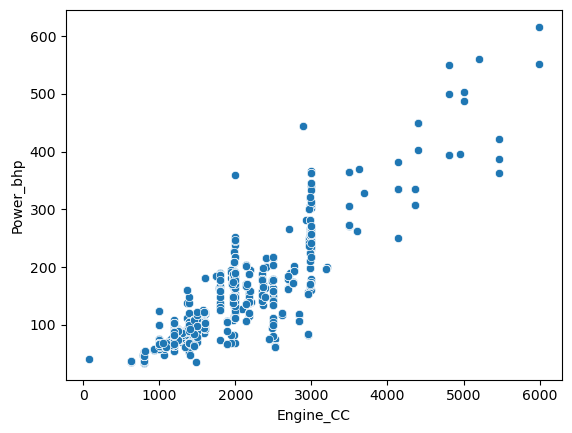

In [67]:
sns.scatterplot(data=df, x='Engine_CC', y='Power_bhp')
plt.show()

## Note*: Engine_CC and Power_bhp both are linearly seperatable

Using Linear Model to fill the null values

In [68]:
non_nan_data = df.dropna(subset=['Power_bhp'])

In [69]:
X_train_na = non_nan_data[['Engine_CC']]
y_train_na = non_nan_data['Power_bhp']

model = LinearRegression()
model.fit(X_train_na, y_train_na)

# Predict the power values for the rows with NaN values in the power column
nan_data = df[df['Power_bhp'].isna()]
X_test_na = nan_data[['Engine_CC']]
predicted_na_values = model.predict(X_test_na)

# Fill the NaN values in the original DataFrame
df.loc[df['Power_bhp'].isna(), 'Power_bhp'] = predicted_na_values

In [70]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
Price                1234
Manufacture             0
Model                   0
Mileage_car             0
Mileage_Units           0
Engine_CC               0
Power_bhp               0
dtype: int64

In [71]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Seats                  int32
Price                float64
Manufacture           object
Model                 object
Mileage_car          float64
Mileage_Units         object
Engine_CC              int32
Power_bhp            float64
dtype: object

In [72]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Manufacture', 'Model', 'Mileage_car',
       'Mileage_Units', 'Engine_CC', 'Power_bhp'],
      dtype='object')

In [73]:
df = df.replace({np.nan: None})

## Clean Data we are pusing to database with table name clean_data

In [74]:
try:
    conn = mysql.connect(host='localhost', database='used_car', user='root', password='root')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS cleaned_data;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE cleaned_data(Location VARCHAR(255), Year YEAR, Kilometers_Driven INT, Fuel_Type VARCHAR(50), Transmission VARCHAR(50), Owner_Type VARCHAR(50), Seats INT, Price DECIMAL(10, 2), Manufacture VARCHAR(50), Model VARCHAR(255), Mileage_car DECIMAL(10, 2), Mileage_Units VARCHAR(50), Engine_CC INT, Power_bhp DECIMAL(10, 2))")
        print("Table is created....")
        #loop through the data frame
        for i,row in df.iterrows():
            #here %S means
            # tips.tips_data
            sql = "INSERT INTO used_car.cleaned_data VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)" # how many columns are there that many %s
            cursor.execute(sql, tuple(row))
            #print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

You're connected to database:  ('used_car',)
Creating table....
Table is created....
